<a href="https://colab.research.google.com/github/sgcortes/2023_NAPLES/blob/main/Lect3_DeepL_MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr>
    <td><img src="https://unioviedo-my.sharepoint.com/:i:/g/personal/sgcortes_uniovi_es/Ebr0ybKDTBNKtoJyzmTBuRYBXY7nE-cCYaH-WDIVJxEVWA?&download=1" width="211" height="69" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></td>
    <td><font color=brown>Deep Learning<br></font>
    <font color=green>Universidad de Oviedo. <br>ML & DL Naples 2023</font> <br><br>sgcortes@uniovi.es</td>
  </tr>
</table>

# Example Written characters recognition (MNIST digits dataset)

In [2]:
%matplotlib inline
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix


### Loading the dataset

11490434/11490434 [==============================] - 0s 0us/step
Clases del dataset [0 1 2 3 4 5 6 7 8 9]
Clase de la imagen:  5
(60000, 28, 28)
uint8


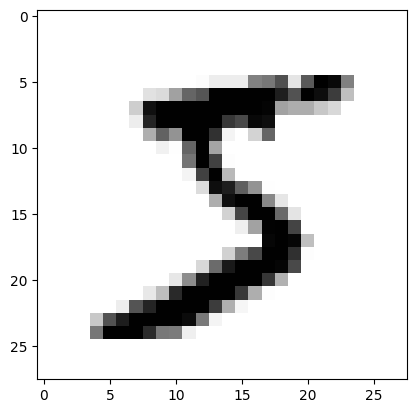

In [3]:
(x_train, clase_train), (x_test, clase_test) = mnist.load_data()

print('Clases del dataset', np.unique(clase_train))
print('Clase de la imagen: ', clase_train[0])
plt.figure()
plt.imshow(x_train[0], cmap='binary');
print(x_train.shape)
print(x_train.dtype)

### Image normalization
The input are passed as an array whose first dimension is the number of examples and the second the dimension of each example. In this case images of 28x28=784.

In [4]:
x_train = x_train/255
x_test = x_test/255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# The size of the first layer of our NN must be then:
print(x_train[0].shape)

(784,)


In Keras, the encoding of the class output is the so-called "one hot" that uses a vector of zeros (one for each class) and the correct class has a digit 1.
It can be achieved with _utils_to_categorical()_:

In [5]:
y_train = keras.utils.np_utils.to_categorical(clase_train)
y_test = keras.utils.np_utils.to_categorical(clase_test)

print('5 first truth classes for training images:\n',y_train[0:5,:])

5 first truth classes for training images:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Model definition
Here we can instanciate the model and add as many layers as we need.


In [6]:
mlp = Sequential()
# 3 layer model, with 64,32, y 16 neurons
mlp.add(Dense(64, input_shape = (784,), activation ='relu'))
# The input layer is implictely indicated in with input_shape parameter
# Omly the first layer got this parameter. The resto on layers know how many inputs 
# reach them
mlp.add(Dense(32, activation = 'relu')) # Dense Hidden Layers
mlp.add(Dense(16, activation = 'relu'))
mlp.add(Dense(10, activation ='softmax')) # Activ function for Multiclass classification

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


For each neuron there is the number of parameters equal to the number of inputs plus 1 (the bias and a weight for each input), therefore for the first layer of these we will have: 28x28 =764; 764+ 1= 765 for each neuron for a layer of 64 neurons: 64 x(784+1) = 50240 parameters The second hidden layer has as many inputs as there are neurons in the previous layer plus one more: (64+1)*32 = 2080. The None refers to the batch size that does not need to be defined yet.

## Cost Function, optimizer and error metric evaluation:
Meanwhile we compile the model it is neccesary to indicate the cost function, optimizer and metric.

In [7]:
mlp.compile(loss='categorical_crossentropy',
           optimizer='adam',
            metrics =['accuracy'])

## TRAINING
Training parameters are define while invoking the _fit_ method.
* Batch size: trining _set_ size 
* Epoch number


In [8]:
hist = mlp.fit(x_train, y_train, batch_size = 128, epochs = 5, verbose =1)

Epoch 1/5
469/469 [==============================] - 9s 7ms/step - loss: 0.5006 - accuracy: 0.8563
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1909 - accuracy: 0.9441
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1401 - accuracy: 0.9582
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1110 - accuracy: 0.9668
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0937 - accuracy: 0.9723


## Accuracy and cost function graphics

<class 'dict'>


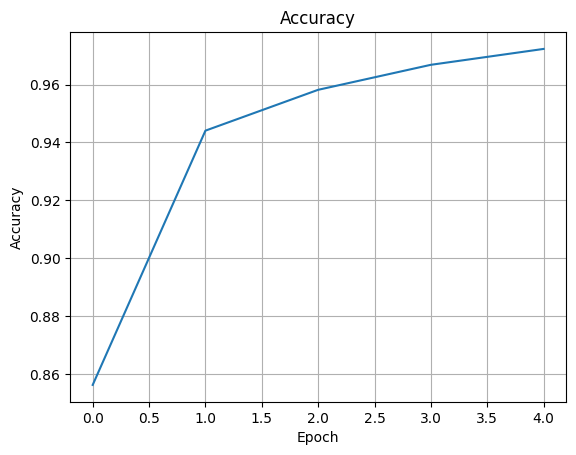

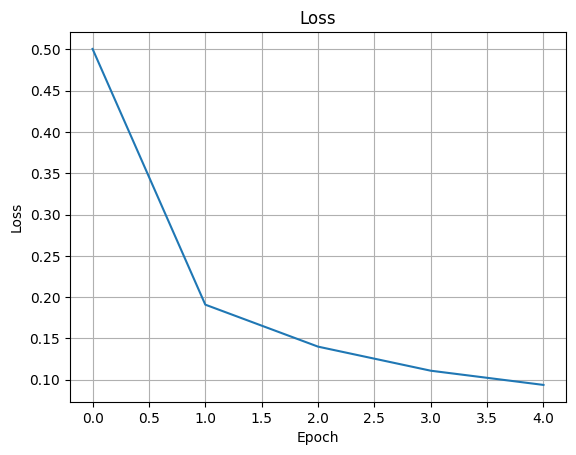

In [9]:
print(type(hist.history))
plt.figure()
plt.plot(hist.history['accuracy'])
plt.grid()
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(hist.history['loss'])
plt.grid()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss');

## Training and Validation precisions. (Inner and external precisions)

In [10]:
acc_train = mlp.evaluate(x_train, y_train)[1]*100
acc_test = mlp.evaluate(x_test, y_test)[1]*100

print('Training accuracy: ', format(acc_train, '.2f'), '%')
print('Test accuracy: ', format(acc_test, '.2f'), '%')

313/313 [==============================] - 1s 3ms/step - loss: 0.1031 - accuracy: 0.9672
Training accuracy:  97.93 %
Test accuracy:  96.72 %


## Predicting image class 
Returns the predictions as class membership probabilities (One shot codification) for each sample.

In [11]:
y_proba = mlp.predict(x_test)
num = 150
print("Probability values:\n",y_proba[num])
# The highest probability value would be:
highp = np.argmax(y_proba[num])
print(f'The predicted class for sample {num} is {highp}')

313/313 [==============================] - 1s 2ms/step
Probability values:
 [2.2982009e-07 4.7088249e-09 1.2159319e-07 1.0528060e-04 4.2645082e-05
 2.5567599e-05 3.5518644e-06 1.5719902e-06 3.4004035e-05 9.9978703e-01]
The predicted class for sample 150 is 9


Now let´s see the corresponding image to check the solution:

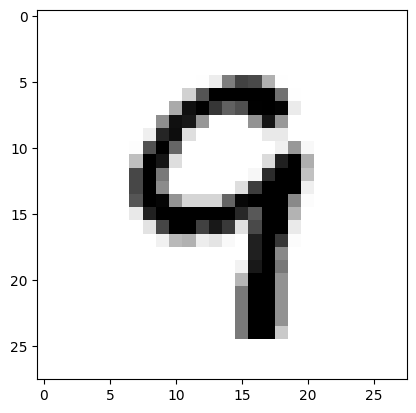

In [12]:
plt.imshow(x_test[num].reshape(28,28), cmap = 'binary');

Let´s check other samples:

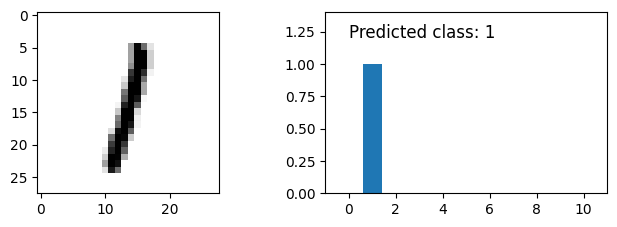

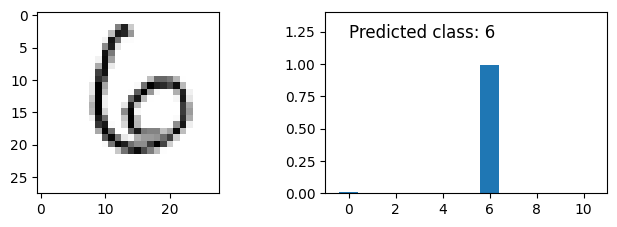

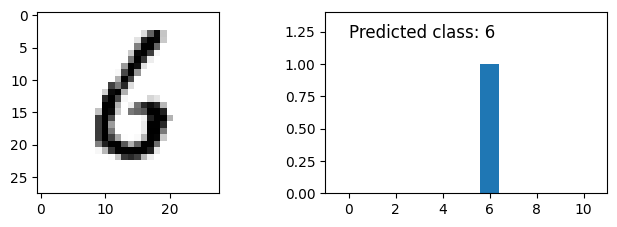

In [13]:
y_pred = np.argmax(y_proba, axis=1)
test_samples =[4670,100,50]
# indice para ticks 
ind = np.arange(0,10)
plt.figure(figsize=(8,8))
plt.subplot(321)
plt.imshow(x_test[test_samples[0]].reshape((28,28)), cmap = 'binary')
plt.subplot(322)
plt.bar(ind, y_proba[test_samples[0]])
plt.axis([-1,11,0,1.4])
plt.text(0, 1.2, 'Predicted class: ' + str(y_pred[test_samples[0]]), fontsize=12);

# indice para ticks 
ind = np.arange(0,10)
plt.figure(figsize=(8,8))
plt.subplot(321)
plt.imshow(x_test[test_samples[1]].reshape((28,28)), cmap = 'binary')
plt.subplot(322)
plt.bar(ind, y_proba[test_samples[1]])
plt.axis([-1,11,0,1.4])
plt.text(0, 1.2, 'Predicted class: ' + str(y_pred[test_samples[1]]), fontsize=12);

# indice para ticks 
ind = np.arange(0,10)
plt.figure(figsize=(8,8))
plt.subplot(321)
plt.imshow(x_test[test_samples[2]].reshape((28,28)), cmap = 'binary')
plt.subplot(322)
plt.bar(ind, y_proba[test_samples[2]])
plt.axis([-1,11,0,1.4])
plt.text(0, 1.2, 'Predicted class: ' + str(y_pred[test_samples[2]]), fontsize=12);

## Model Validation
Let´s see the confusion matrix for test and training sets.

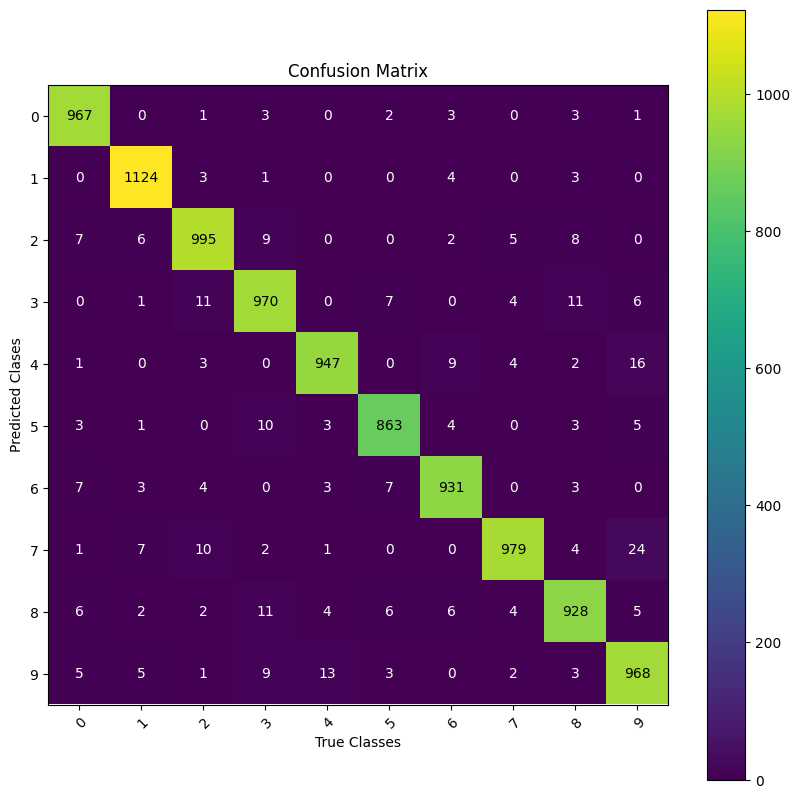

In [16]:
# Confusion Matrix

cm = confusion_matrix(clase_test,y_pred)

# confusion matrix Graphics

clases = np.unique(clase_train)
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

# Add title and lables to the confusion matrix graphic
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=clases, yticklabels=clases,
       title='Confusion Matrix',
       ylabel='Predicted Clases',
       xlabel='True Classes')

# Rota los nombres de las etiquetas en el eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i, cm[i,j],
               ha="center", va="center",
               color="white" if cm[i,j] <350 else "black")
plt.show()